In [1]:
import xarray as xr
import sys
import glob
import numpy as nmp

In [2]:
fresults=sorted(glob.glob('result_??.nc'))
ds=xr.open_mfdataset(fresults,concat_dim='time',combine='nested')

In [3]:
ds

<xarray.Dataset>
Dimensions:         (time: 10016)
Coordinates:
  * time            (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Data variables:
    latitude        (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sossheig_np     (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sossheig_bl     (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    distance        (time) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    time_counter    (time) datetime64[ns] dask.array<chunksize=(167,), meta=np.ndarray>
Attributes:
    about:    Created with Gonzag package => https://github.com/brodeau/gonzag

In [4]:
ds.time_counter

<xarray.DataArray 'time_counter' (time: 10016)>
dask.array<concatenate, shape=(10016,), dtype=datetime64[ns], chunksize=(173,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time

In [5]:
VT = ds.time

In [6]:
print(VT)

<xarray.DataArray 'time' (time: 10016)>
array([1.391383e+18, 1.391383e+18, 1.391383e+18, ..., 1.396827e+18,
       1.396827e+18, 1.396827e+18])
Coordinates:
  * time     (time) float64 1.391e+18 1.391e+18 ... 1.397e+18 1.397e+18
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time


In [7]:
VM=ds.sla_unfiltered

In [8]:
VM[3767:3866].values

array([ 0.069,  0.085,  0.093,  0.106,  0.107,  0.124,  0.119,  0.087,
        0.089,  0.116,  0.106,  0.112,  0.107,  0.097,  0.087,  0.094,
        0.102,  0.081,  0.092,  0.098,  0.069,  0.069,  0.05 ,  0.069,
        0.068,  0.062,  0.071,  0.056,  0.076,  0.074,  0.068,  0.088,
        0.072,  0.077,  0.095,  0.083,  0.058,  0.063,  0.091,  0.083,
        0.041,  0.021,  0.029,  0.018,  0.005,  0.002, -0.003, -0.002,
       -0.017, -0.031,  0.181,  0.111,  0.152,  0.186,  0.205,  0.211,
        0.227,  0.256,  0.289,  0.329,  0.385,  0.382,  0.357,  0.379,
        0.391,  0.388,  0.368,  0.36 ,  0.353,  0.331,  0.322,  0.327,
        0.336,  0.33 ,  0.316,  0.341,  0.339,  0.341,  0.326,  0.315,
        0.303,  0.302,  0.307,  0.297,  0.302,  0.303,  0.307,  0.308,
        0.301,  0.298,  0.294,  0.303,  0.31 ,  0.307,  0.298,  0.308,
        0.305,  0.294,  0.284])

In [9]:
ii=nmp.where(nmp.isnan(VM.values)==1)

In [10]:
print(ii[0])

[]


In [55]:
print(nmp.max(ds.time_counter.values))

2014-04-29T23:14:03.871097088


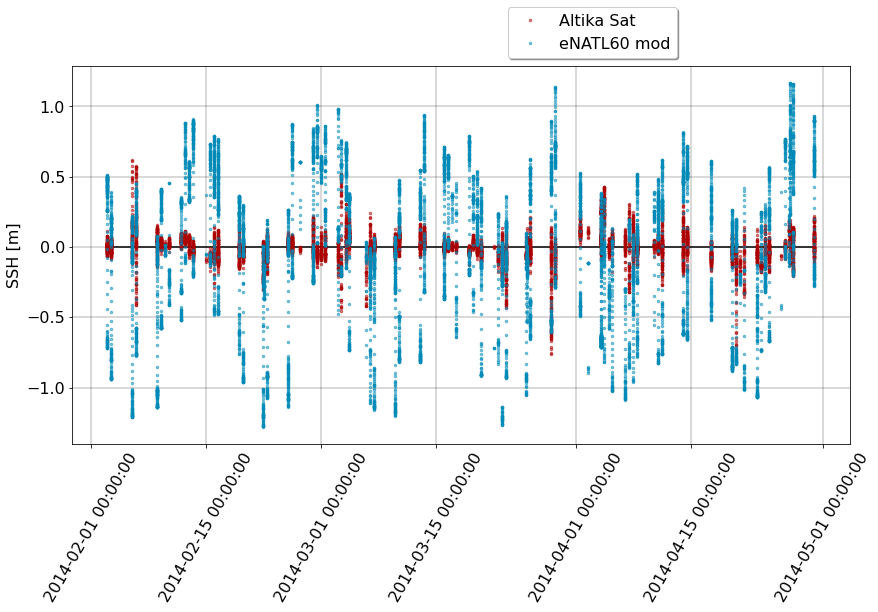

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

clr_sat = '#AD0000'
clr_mod = '#008ab8'

VT = ds.time_counter ; # time from UNIX Epoch to Matlplotlib friendly...

fig = plt.figure(num = 1, figsize=(12,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation='60')
plt.hlines(0,nmp.min(ds.time_counter.values),nmp.max(ds.time_counter.values), colors='k',                   label=None,  zorder=5)
plt.plot(VT, ds.sla_unfiltered-nmp.mean(ds.sla_unfiltered), '.', color=clr_sat, markersize=5, alpha=0.5, label='Altika Sat', zorder=10)
plt.plot(VT, ds.sossheig_bl-nmp.mean(ds.sossheig_bl), '.', color=clr_mod, markersize=5, alpha=0.5, label='eNATL60 mod', zorder=15)
plt.ylabel('SSH [m]')
ax.grid(color='k', linestyle='-', linewidth=0.3)
lgnd = plt.legend(bbox_to_anchor=(0.55, 1.), ncol=1, shadow=True, fancybox=True)



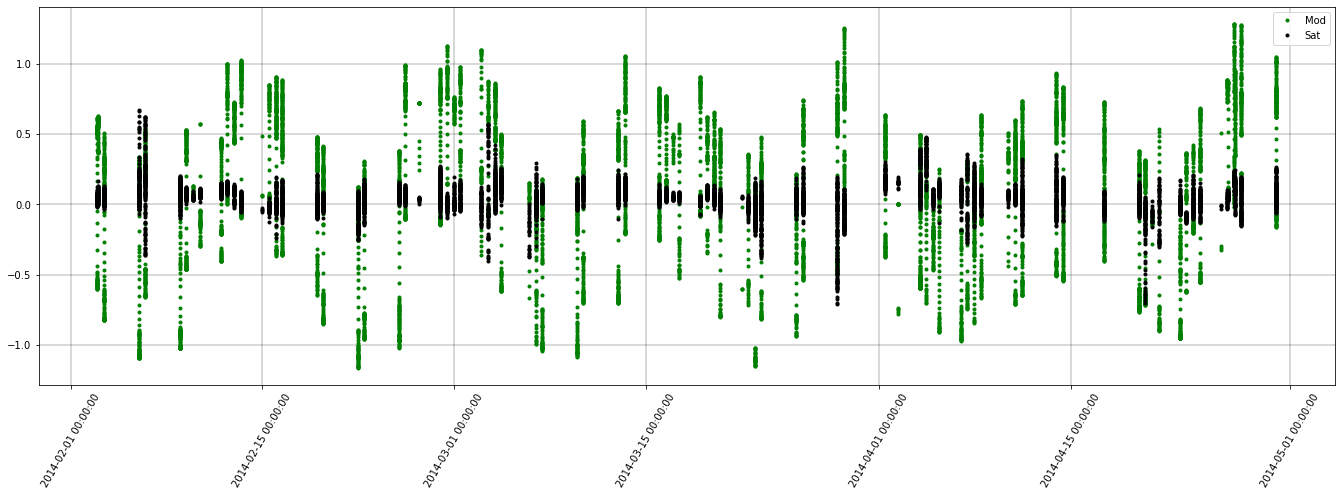

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

fig = plt.figure(num = 1, figsize=(20,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
#plt.plot(ds.time_counter,ds.sossheig_np,'b.',label='Nearest Point')
plt.plot(ds.time_counter,ds.sossheig_bl,'g.',label='Mod')
plt.plot(ds.time_counter,ds.sla_unfiltered,'k.', label='Sat')
plt.legend()
plt.xticks(rotation='60')
ax.grid(color='k', linestyle='-', linewidth=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))


In [13]:
from gonzag.spectralysis import *


In [14]:
ISeg_beg, ISeg_end = FindUnbrokenSegments( ds.time, ds.distance, ds.sossheig_bl, \
                                             rcut_time=1.2e+09, rcut_dist=7.8 )


In [15]:
print(ISeg_beg, ISeg_end)

[    0    49   167   202   216   315   364   483   488   537   567   616
   679   727   778   815   864   886   935  1052  1101  1131  1220  1223
  1272  1391  1396  1445  1564  1568  1617  1736  1741  1790  1817  1866
  1969  2015  2018  2137  2138  2164  2168  2217  2336  2341  2390  2509
  2513  2523  2562  2651  2662  2711  2830  2835  2874  2884  2912  2961
  3024  3072  3157  3202  3206  3219  3251  3268  3381  3430  3452  3459
  3460  3469  3543  3581  3592  3688  3709  3758  3877  3931  4050  4055
  4104  4133  4157  4167  4182  4266  4293  4315  4434  4437  4479  4528
  4647  4652  4701  4820  4824  4844  4873  4975  4985  5024  5121  5143
  5168  5176  5192  5216  5265  5266  5326  5374  5406  5460  5509  5531
  5576  5580  5743  5786  5862  5864  5913  5934  5948  6028  6077  6150
  6175  6178  6224  6227  6253  6276  6337  6341  6390  6509  6513  6562
  6603  6681  6683  6720  6732  6751  6833  6882  6919  6968  6985  7034
  7080  7129  7134  7135  7172  7235  7284  7403  7

In [16]:
print(len(ISeg_beg))

238


In [17]:
ds.distance[12].values-ds.distance[11].values

6.593076418648025

In [18]:
NbSeg, Nsl, IDEDSeg = SegmentSelection(ISeg_beg, ISeg_end, np_valid_seg=70)


 *** [SegmentSelection()]: Will use 24 segments with a fixed length of 100 points!
     ==> 24 selected segments out of the 238 available (requested minimum length is 70 points)



In [36]:
XPs, XPm, rdist_sample = Process4FFT( IDEDSeg, ds.distance, ds.sossheig_bl, ds.sla_unfiltered )


0
 *** [Process4FFT()]: applying linear detrending...
 *** [Process4FFT()]: centering about 0...
 *** [Process4FFT()]: applying "Tukey" tappering...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23



In [37]:
Kwn, PwSpc_s, PwSpc_m = ApplyFFT( IDEDSeg, XPs, XPm, rdist_sample )


 *** [ApplyFFT()]: Applying FFT with a dx_sample of  6.603  km



In [40]:
CLIMPORN_DIR = '/home/jovyan/climporn/python' ; # get it there: https://github.com/brodeau/climporn
sys.path.append(CLIMPORN_DIR)
import climporn as cp


In [41]:
# Building our spectrum as the mean of the NbSeg spectra:
vps_mod = nmp.mean(PwSpc_m[:,:],axis=0)
vps_sat = nmp.mean(PwSpc_s[:,:],axis=0)

# Blabla for the plot:
cinfrm = str(NbSeg)+' segments\n'+str(Nsl)+' points/segment\n'+r'$\Delta$d sat.: '+str(round(rdist_sample,1))+' km'

/home/jovyan/climporn/python/climporn/plot.py:1459: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nmp.log10(vk2), nmp.log10(vps2), '-', color=clr2, linewidth=lw2, label=clab2, zorder=15)
/home/jovyan/climporn/python/climporn/plot.py:1459: RuntimeWarning: invalid value encountered in log10
  plt.plot(nmp.log10(vk2), nmp.log10(vps2), '-', color=clr2, linewidth=lw2, label=clab2, zorder=15)
/home/jovyan/climporn/python/climporn/plot.py:1463: RuntimeWarning: divide by zero encountered in log10
  plt.plot(    nmp.log10(vk1), nmp.log10(vps1), '-', color=clr1, linewidth=lw1, label=clab1, zorder=5)
/home/jovyan/climporn/python/climporn/plot.py:1463: RuntimeWarning: invalid value encountered in log10
  plt.plot(    nmp.log10(vk1), nmp.log10(vps1), '-', color=clr1, linewidth=lw1, label=clab1, zorder=5)
findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.


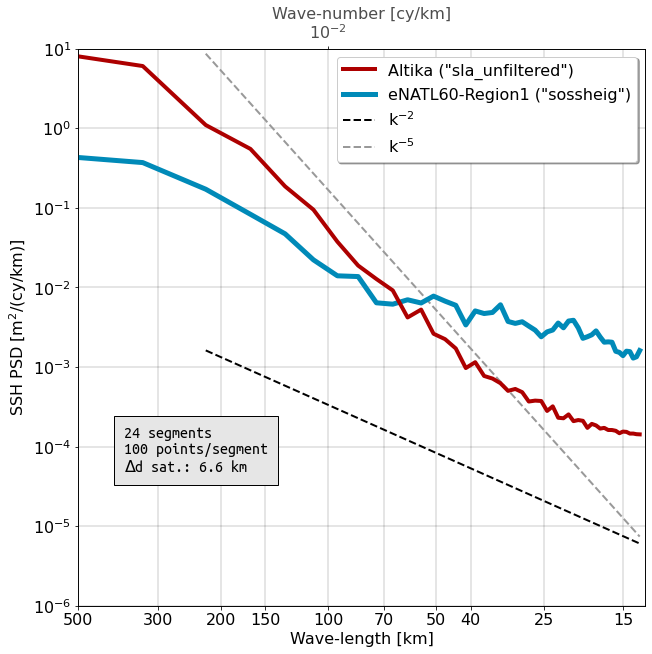

In [45]:
name_mod = 'eNATL60-Region1'
name_ssh_mod='sossheig'
name_sat= 'Altika'
name_ssh_sat='sla_unfiltered'
ii = cp.plot("pow_spectrum_ssh")(Kwn, vps_mod, clab1=name_mod+' ("'+name_ssh_mod+'")', clr1=clr_mod, lw1=5, \
                                 cinfo=cinfrm, logo_on=False, \
                                 L_min=13., L_max=500., P_min_y=-6, P_max_y=1, \
                                 l_show_k4=False, l_show_k5=True, l_show_k11o3=False, l_show_k2=True, \
                                 vk2=Kwn, vps2=vps_sat, clab2=name_sat+' ("'+name_ssh_sat+'")', clr2=clr_sat, lw2=4)

